In [1]:
import re
import rdkit.Chem as Chem
from openbabel import pybel
from rdkit.Chem import rdDetermineBonds
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import DrawingOptions
from parameter_extractor import ParameterExtractor, Property

IPythonConsole.molSize = (300, 300)  # Change image size
DrawingOptions.bondLineWidth = 1.8

In [2]:
filename = "l_2_SPE"

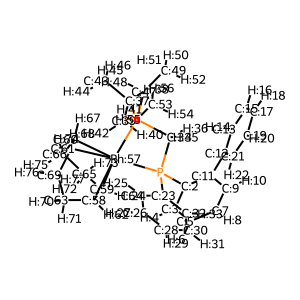

In [3]:
xyz = Chem.MolFromXYZFile(f"./xyz/{filename}.xyz")
xyz_conn = Chem.Mol(xyz)
rdDetermineBonds.DetermineConnectivity(
    xyz_conn)  # Doing this connects all the atoms. Check that connections are always correct. By importing .pdb file connections are premade but usually there is no Rh-P bond (could be useful to isolate COD).
for atom in xyz_conn.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
xyz_conn

In [3]:
comp = ParameterExtractor(filename)

Rh 60 - C 50 : Bond not found
Rh 60 - C 48 : Bond not found
Rh 60 - C 40 : Bond not found
Rh 60 - C 38 : Bond not found
Rh 60 - C 50 : Antibond not found
Rh 60 - C 48 : Antibond not found
Rh 60 - C 40 : Antibond not found
Rh 60 - C 38 : Antibond not found


In [4]:
bite_angle = comp.get_angle(comp.p1, comp.rh, comp.p2)
p1_rh_dist = comp.get_bond_distance(comp.p1, comp.rh)
p2_rh_dist = comp.get_bond_distance(comp.p2, comp.rh)
p1_bridge_dist = comp.get_bond_distance(comp.p1, comp.bridge)
p2_bridge_dist = comp.get_bond_distance(comp.p2, comp.bridge)
bridge_angle = comp.get_angle(comp.p1, comp.bridge, comp.p2)

print("P1-Rh: " + str(p1_rh_dist), "P2-Rh: " + str(p2_rh_dist), "P1-Bridge: " + str(p1_bridge_dist),
      "P2-Bridge: " + str(p2_bridge_dist), "Bite angle: " + str(bite_angle), "Bridge angle: " + str(bridge_angle))

P1-Rh: 2.3717137264012282 P2-Rh: 2.371704450390056 P1-Bridge: 1.8761633724172317 P2-Bridge: 1.8745551472282698 Bite angle: 72.71521118287279 Bridge angle: 97.13314904477572


In [6]:
comp.dipole

1.9588

In [7]:
r1_p1_r2_angle = comp.get_angle(comp.r1, comp.p1, comp.r2)
r1_p1_rh_angle = comp.get_angle(comp.r1, comp.p1, comp.rh)
rh_p1_bridge_angle = comp.get_angle(comp.rh, comp.p1, comp.bridge)
r1_p1_bridge_angle = comp.get_angle(comp.r1, comp.p1, comp.bridge)
r2_p1_bridge_angle = comp.get_angle(comp.r2, comp.p1, comp.bridge)
r2_p1_rh_angle = comp.get_angle(comp.r2, comp.p1, comp.rh)

p1_angle_sum = r1_p1_bridge_angle + r1_p1_r2_angle + r2_p1_bridge_angle
p1_angle_sum

317.7641075744336

In [8]:
r3_p2_r4_angle = comp.get_angle(comp.r3, comp.p2, comp.r4)
r3_p2_rh_angle = comp.get_angle(comp.r3, comp.p2, comp.rh)
rh_p2_bridge_angle = comp.get_angle(comp.rh, comp.p2, comp.bridge)
r3_p2_bridge_angle = comp.get_angle(comp.r3, comp.p2, comp.bridge)
r4_p2_bridge_angle = comp.get_angle(comp.r4, comp.p2, comp.bridge)
r4_p2_rh_angle = comp.get_angle(comp.r4, comp.p2, comp.rh)

p2_angle_sum = r3_p2_bridge_angle + r3_p2_r4_angle + r4_p2_bridge_angle
p2_angle_sum

317.8169618362265

In [7]:
comp.mol.GetBondBetweenAtoms(comp.p1.GetIdx(), comp.rh.GetIdx()).GetProp(Property.BOND_OCCUPANCY.value)

'-0.54144'

In [29]:
## If we renumber to place the Rh(COD) in the end, the atom numbering for the ligand is the same as the No_Rh version.

# import os
# for file in os.listdir("./out/spe"):
#     error = None
#     filename = file.split(".")[0]
#     if os.path.isfile(f"./out/spe_no_rh/{filename}_NoRh.out"):
#         comp = ParameterExtractor(filename, filename)
#         with open(f"./out/spe_no_rh/{filename}_NoRh.out") as f:
#             __out = f.readlines()
#         mol_no_rh = next(pybel.readfile("out", f"./out/spe_no_rh/{filename}_NoRh.out"))
#         xyz = mol_no_rh.write("xyz")
#         mol_no_rh = Chem.MolFromXYZBlock(xyz)
#         rdDetermineBonds.DetermineConnectivity(mol_no_rh)
#         rh_cod_indices = [comp.rh.GetIdx()] + [atom.GetIdx() for atom in comp.cod]
#         non_rh_cod_indices = [atom.GetIdx() for atom in comp.mol.GetAtoms() if atom.GetIdx() not in rh_cod_indices]
#         new_order = non_rh_cod_indices + rh_cod_indices
#         new_mol = Chem.RenumberAtoms(comp.mol, new_order)
#         for atom in mol_no_rh.GetAtoms():
#             idx = atom.GetIdx()
#             if atom.GetSymbol() != new_mol.GetAtomWithIdx(idx).GetSymbol():
#                 error = filename
#         if error:
#             print(error)
#     else:
#         print(filename)

In [ ]:
# TODO: Rh LP occupation and energy
# TODO: P LP occupation and energy (requires noRh calculation)